<a href="https://colab.research.google.com/github/niuguy/digithealthcourse/blob/master/MIMIC3_Mortality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is machine learning

![machine learning](https://github.com/niuguy/digithealthcourse/blob/master/pics/Programming%20and%20Machine%20learning.png?raw=true)

## The pipeline

![Ml_pipeline](https://github.com/niuguy/digithealthcourse/blob/master/pics/ML_pipeline.png?raw=true)

## Case study for mortality prediction

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Train Test Split

In [0]:
df_m3 = pd.read_csv('/content/drive/My Drive/Dataset/df_m3_processed.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
features = [ 'ADMISSION_TYPE',
       'MARITAL_STATUS', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'ETHNICITY', 'GENDER', 'AGE', 'CALLOUT_COUNT',
       'DIAG_COUNT', 'PRES_COUNT', 'PROC_COUNT', 'CPT_COUNT', 'LAB_COUNT',
       'INPUTS_CV_COUNT', 'INPUTS_MV_COUNT', 'OUTPUT_COUNT', 'TRANSFER_COUNT',
       'MICRO_COUNT']

In [0]:
train_X = df_m3.loc[:,features]
train_y = df_m3.loc[:,'MORTAL']
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=2, stratify=train_y)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
help(train_test_split)

### RandomForest

![RandomForest](https://github.com/niuguy/digithealthcourse/blob/master/pics/RandomForestClassifire.jpg?raw=true)

In [0]:
rf = RandomForestClassifier(n_estimators=200,
                             random_state = 42,
                             n_jobs=-1)

In [0]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Classification report\n',classification_report(y_test, y_pred))    

F1 Score: 0.46
Classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      9151
           1       0.83      0.31      0.46      1199

    accuracy                           0.91     10350
   macro avg       0.87      0.65      0.70     10350
weighted avg       0.91      0.91      0.90     10350



https://en.wikipedia.org/wiki/F1_score 

![classification matrics](https://github.com/niuguy/digithealthcourse/blob/master/pics/classification_metrics.jpg?raw=true)

Confusion matrix

Confusion matrix:
[[9071   80]
 [ 826  373]]


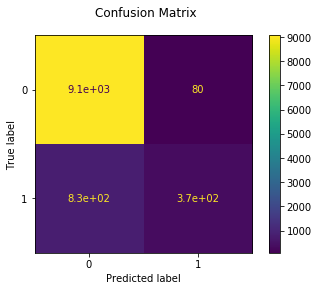

In [0]:
disp = plot_confusion_matrix(rf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Feature Importance

In [0]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [0]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,INPUTS_CV_COUNT,0.091364
1,OUTPUT_COUNT,0.090987
2,LAB_COUNT,0.087030
3,TRANSFER_COUNT,0.080443
4,DIAG_COUNT,0.076069
5,AGE,0.075867
6,MICRO_COUNT,0.067764
7,INPUTS_MV_COUNT,0.066478
8,PRES_COUNT,0.065611
9,CPT_COUNT,0.062405


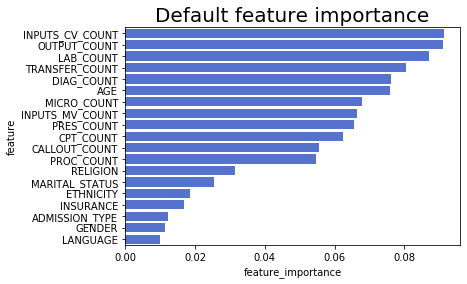

In [0]:
var_imp_plot(base_imp, 'Feature importance')

**Q:** Can we get to the conclusion that INPUTS_CV_COUNT and OUTPUT_COUNT are the most important features?

Reference    [Explaining Feature Importance by example of a Random Forest](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e) 

More about RandomForest  https://youtube.com/watch?v=J4Wdy0Wc_xQ

### Logistic Regression

![Logistic Regression](https://github.com/niuguy/digithealthcourse/blob/master/pics/Logistic%20Regression.png?raw=true)

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Classification report\n',classification_report(y_test, y_pred))   

F1 Score: 0.16
Classification report
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      9151
           1       0.65      0.09      0.16      1199

    accuracy                           0.89     10350
   macro avg       0.77      0.54      0.55     10350
weighted avg       0.87      0.89      0.85     10350



### Neural Network

![NN](https://github.com/niuguy/digithealthcourse/blob/master/pics/neural%20networks.png?raw=true)

In [0]:
import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

Using TensorFlow backend.


In [0]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 9,  activation = 'relu', input_dim = 19))
# model.add(Dense(units = 9, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train
model.fit(X_train, y_train, batch_size = 32, epochs = 100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





41398/41398 [==============================] - 2s 55us/step - loss: 0.3798 - acc: 0.8801
Epoch 2/100
41398/41398 [==============================] - 2s 38us/step - loss: 0.3049 - acc: 0.8861
Epoch 3/100
41398/41398 [==============================] - 2s 39us/step - loss: 0.2930 - acc: 0.8881
Epoch 4/100
41398/41398 [==============================] - 2s 40us/step - loss: 0.2880 - acc: 0.8891
Epoch 5/100
41398/41398 [==============================] - 2s 40us/step - loss: 0.2855 - acc: 0.8898
Epoch 6/100
41398/41398 [==============================] - 2s 41us/step - loss: 0.2830 - acc: 0.8919
Epoch 7/100
41398/41398 [==============================] - 2s 40us/step - loss: 0.2811 - acc: 0.8940
Epoch 8/100
41398/41398 [==============================] - 2s 40us/step - loss: 0.2793 - acc: 0.8946
Epoch 9/100
41398/41398 [==============================] - 2s 39us/step - loss: 0.278

In [0]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

In [0]:
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_final)))
print('Classification report\n',classification_report(y_test, y_final))   

F1 Score: 0.45
Classification report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9151
           1       0.68      0.34      0.45      1199

    accuracy                           0.90     10350
   macro avg       0.80      0.66      0.70     10350
weighted avg       0.89      0.90      0.89     10350



Know more about Neural Network   https://www.youtube.com/watch?v=aircAruvnKk

### What's more?


![alt text](https://miro.medium.com/max/2414/1*ak2utPSmFTOMoZL3mTgWrg.png)

Refer to https://medium.com/datadriveninvestor/homemade-machine-learning-in-python-ed77c4d6e25b